In [1]:
#librerie necessarie per la classificazione
%matplotlib inline
%pylab
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#end import from course
from pandas.plotting import parallel_coordinates

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#open file
df = pd.read_csv('abalone-data.csv')
df.head()
len(df)

4177

In [3]:
#rename columns
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#number of Infant abalones in the dataset
count=0
for i in df['Sex']:
    if i=='I':
        count+=1
count

1342

In [5]:
#discard the “Infant” abalones
df = df[df['Sex'] != 'I' ]
df.head()
len(df)

2835

In [6]:
 # Generate a mapping of Sex from a string to a number representation    
sexes = sorted(df['Sex'].unique()) #Return unique values 
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1))) #create a dictionary {F: number of records; M: number of records}
# Transform Sex from a string to a number representation
df['Sex'] = df['Sex'].map(genders_mapping).astype(int) #Male=1; Female=0
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [7]:
#calculate the median value of the column 
df['Rings'].median()

10.0

C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


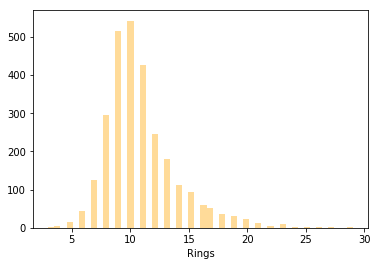

In [8]:
sns.distplot(df.Rings, kde=False, color = 'orange');

In [9]:
df['Rings'].describe()

count    2835.000000
mean       10.900882
std         3.069252
min         3.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        29.000000
Name: Rings, dtype: float64

C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


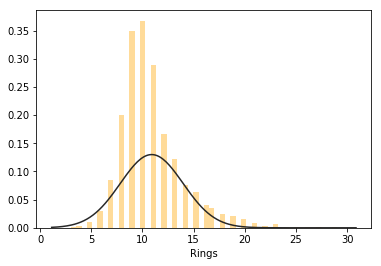

In [10]:
from scipy.stats import norm
ax = sns.distplot(df.Rings, fit=norm, kde=False, color="orange")

In [11]:
print((df.Rings == 9) | (df.Rings == 10) | (df.Rings == 11))

0       False
1       False
2        True
3        True
6       False
7       False
8        True
9       False
10      False
11       True
12       True
13       True
14       True
15      False
17       True
18      False
19       True
20       True
22      False
23       True
24       True
25       True
26       True
27      False
28      False
29       True
30       True
31      False
32      False
33      False
        ...  
4135     True
4136     True
4137     True
4138     True
4139     True
4140     True
4141     True
4142    False
4143    False
4144     True
4145     True
4146     True
4147     True
4148     True
4156    False
4157    False
4159     True
4160     True
4161     True
4162    False
4167     True
4168    False
4169     True
4170     True
4171    False
4172     True
4173     True
4174     True
4175     True
4176    False
Name: Rings, Length: 2835, dtype: bool


In [12]:
print(df[(df.Rings == 9)|(df.Rings == 10)|(df.Rings == 11)])
len(df[(df.Rings == 9)|(df.Rings == 10)|(df.Rings == 11)])

      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
8       1   0.475     0.370   0.125        0.5095          0.2165   
11      1   0.430     0.350   0.110        0.4060          0.1675   
12      1   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
17      0   0.440     0.340   0.100        0.4510          0.1880   
19      1   0.450     0.320   0.100        0.3810          0.1705   
20      1   0.355     0.280   0.095        0.2455          0.0955   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.18

1483

In [13]:
print((df.Rings == 17) | (df.Rings == 18) | (df.Rings == 19)| (df.Rings == 20)| (df.Rings == 21))

0       False
1       False
2       False
3       False
6        True
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
17      False
18      False
19      False
20      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32       True
33       True
        ...  
4135    False
4136    False
4137    False
4138    False
4139    False
4140    False
4141    False
4142    False
4143    False
4144    False
4145    False
4146    False
4147    False
4148    False
4156    False
4157    False
4159    False
4160    False
4161    False
4162    False
4167    False
4168    False
4169    False
4170    False
4171    False
4172    False
4173    False
4174    False
4175    False
4176    False
Name: Rings, Length: 2835, dtype: bool


In [14]:
print(df[(df.Rings == 17)|(df.Rings == 18)|(df.Rings == 19)|(df.Rings == 20)|(df.Rings == 21)])
len(df[(df.Rings == 17)|(df.Rings == 18)|(df.Rings == 19)|(df.Rings == 20)|(df.Rings == 21)])

      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
6       0   0.530     0.415   0.150        0.7775          0.2370   
9       0   0.550     0.440   0.150        0.8945          0.3145   
32      1   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
72      0   0.595     0.475   0.170        1.2470          0.4800   
83      1   0.595     0.475   0.160        1.3175          0.4080   
128     1   0.700     0.535   0.160        1.7255          0.6300   
129     1   0.710     0.540   0.165        1.9590          0.7665   
130     1   0.595     0.480   0.165        1.2620          0.4835   
163     0   0.725     0.560   0.210        2.1410          0.6500   
166     0   0.725     0.575   0.175        2.1240          0.7650   
167     0   0.680     0.570   0.205        1.8420          0.6250   
181     1   0.640     0.510   0.175        1.3680          0.5150   
240     1   0.565     0.425   0.16

155

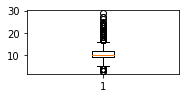

<Figure size 432x288 with 0 Axes>

In [15]:
fig = plt.figure()
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (1, 0))
plt.boxplot(df['Rings'])
plt.show()
plt.savefig('bu.jpg')

DISCRETIZZAZIONE DATI BILANCIATI

In [16]:
rings_values = list(df['Rings']) #put values of the attribute in a list
rings_bins = [] 
for number_rings in rings_values:
    if number_rings <= 10:
        rings_bins.append("3-10") #first class
    else:
        rings_bins.append("11-29") #second class
df['Bin'] = rings_bins # new column of dataset divided by the value of the median
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Bin
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,11-29
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,3-10
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,3-10
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3-10
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,11-29


In [17]:
first= len(df[df.Bin == '3-10'])
second= len(df[df.Bin == '11-29'])
perc_first= float(first)/float(len(df))
perc_second = float(second)/float(len(df))
print(perc_first)
print(perc_second)

0.5442680776014109
0.45573192239858906


DISCRETIZZAZIONE DATI NON BILANCIATI

In [18]:
#new df with rings values
df_imbalanced = df.copy()

In [19]:
rings_column = list(df_imbalanced['Rings'])
rings_bins = []
for number_rings in rings_column:
    if number_rings <= 14:
        rings_bins.append("3-14")
    else:
        rings_bins.append("15-29")
df_imbalanced['Bin'] = rings_bins
df_imbalanced.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Bin
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,15-29
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,3-14
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,3-14
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3-14
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,15-29


In [20]:
first_I= len(df_imbalanced[df_imbalanced.Bin == "3-14"])
second_I= len(df_imbalanced[df_imbalanced.Bin == "15-29"])
perc_first_I= float(first_I)/float(len(df_imbalanced))
perc_second_I = float(second_I)/float(len(df_imbalanced))
print(perc_first_I)
print(perc_second_I)

0.8835978835978836
0.1164021164021164


In [21]:
df_train = df.values #Convert the DataFrame to a numpy array --> balanced
train_target = df_train[:, 9] #column bin
train_rings = df_train[:, 8] # column rings
train_features = df_train[:,:8] # Training data features, skip the column 'Bin'

Imbalanced = df_imbalanced.values #Convert the DataFrame to a numpy array --> imbalanced
train_features_imbalanced = Imbalanced[:,:8]
train_rings_imbalanced = Imbalanced[:, 8]
train_target_imbalanced = Imbalanced[:, 9]

In [22]:
#OVERSAMPLING SULLA CLASSE DI MINORANZA (15-29)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print(train_features_imbalanced[0])
print(train_target_imbalanced[0])

[1 0.455 0.365 0.095 0.514 0.2245 0.10099999999999999 0.15]
15-29


In [23]:
sm = SMOTE(ratio = {"15-29":1800})
trainfSMO, traintSMO = sm.fit_sample(train_features_imbalanced, train_target_imbalanced)

In [24]:
print(len(train_features_imbalanced))

2835


print(len(trainfSMO))
print(len(traintSMO))

## Support Vector Machine

In [28]:
from sklearn import svm
clf = svm.SVC()

In [29]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(train_features, train_target, test_size = 0.20, random_state = 0)

GRID SEARCH

In [30]:
param_dist = {
    'kernel' : ['rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'C' : [0.001, 0.01, 0.1, 1, 10]
}
search = GridSearchCV(clf, param_grid=param_dist, n_jobs=10)

#GridSearchCV implements a “fit” and a “score” method. 
#Parametri:
#1) estimator
#2) param_grid= Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 
#This enables searching over any sequence of parameter settings.
#3) Number of jobs to run in parallel.

In [31]:
search.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=10,
       param_grid={'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
def report(results, n_top=3): #function from the file of the data mining course
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [33]:
report(search.cv_results_)

Model with rank: 1
Mean validation score: 0.731 (std: 0.003)
Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.710 (std: 0.007)
Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.707 (std: 0.011)
Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}



In [34]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(train_features_imbalanced, train_target_imbalanced, test_size = 0.20, random_state = 0)

IMBALANCED DATA

In [35]:
#dati sbilanciati SENZA oversampling
clfimb = svm.SVC(C=10, gamma = 1, kernel='rbf') #default parameter --> http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

scoresimb = cross_validation.cross_val_score(clfimb, x_train_imb, y_train_imb, cv=5) 

#formula presa dal file del professore: vedi sotto 
#scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10) 
#utilizzo: Evaluate a score by cross-validation. 
#Parametri: 
#1) The object to use to fit the data.
#2) The data to fit.
#3) The target variable to try to predict in the case of supervised learning
#4) cv:  int, cross-validation generator or an iterable. Determines the cross-validation splitting strategy

print('class: 3-14', 'n. samples:', first_I , 'perc:', perc_first_I, '\n')
print('class: 15-29', 'n. samples:', second_I, 'perc:', perc_second_I, '\n')
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresimb.mean(), scoresimb.std() * 2))
print(scoresimb.mean())
print(scoresimb.std())

class: 3-14 n. samples: 2505 perc: 0.8835978835978836 

class: 15-29 n. samples: 330 perc: 0.1164021164021164 

Accuracy: 0.89 (+/- 0.01)
0.8937370862734395
0.005135939444008576


In [36]:
x_trainfSMO, x_testSMO, y_traintSMO, y_testSMO = train_test_split(trainfSMO, traintSMO, test_size = 0.20, random_state = 0)

In [37]:
#CLASSI BILANCIATE con OVERSAMPLING
clfSMO = svm.SVC(C=10, gamma = 1, kernel='rbf') #default parameter --> http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

scoresSMO = cross_validation.cross_val_score(clfSMO, x_trainfSMO,y_traintSMO, cv=5) 

#formula presa dal file del professore: vedi sotto
#scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10) 
#utilizzo: Evaluate a score by cross-validation. 
#Parametri: 
#1) The object to use to fit the data.
#2) The data to fit.
#3) The target variable to try to predict in the case of supervised learning
#4) cv:  int, cross-validation generator or an iterable. Determines the cross-validation splitting strategy


print('majority class: 3-15', 'n. samples:', first_I , 'perc:', perc_first_I, '\n')
print('minority class (oversampled): 16-29', 'n. samples:1800' '\n')
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresSMO.mean(), scoresSMO.std() * 2))

majority class: 3-15 n. samples: 2505 perc: 0.8835978835978836 

minority class (oversampled): 16-29 n. samples:1800

Accuracy: 0.81 (+/- 0.03)


In [38]:
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Oranges):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Accuracy:  0.8972663139329806
Confusion matrix, without normalization
[[  26  228]
 [   5 2009]]


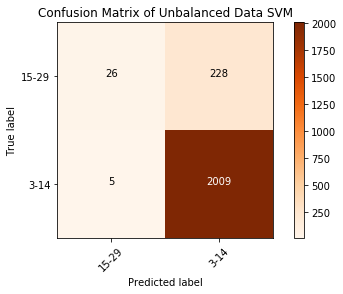

In [39]:
#CLASSI SENZA OVERSAMPLING
clfimb.fit(x_train_imb,y_train_imb)
predicted_imbalanced = clfimb.predict(x_train_imb)
print("Accuracy: ", accuracy_score(y_train_imb, predicted_imbalanced))
classes= ['15-29', '3-14']
cmimb = confusion_matrix(y_train_imb, predicted_imbalanced)
plot_confusion_matrix(cmimb, classes=classes, title="Confusion Matrix of Unbalanced Data SVM")

Accuracy:  0.8124274099883856
Confusion matrix, without normalization
[[1075  371]
 [ 275 1723]]


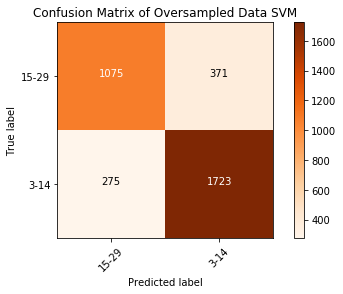

In [40]:
#CLASSI CON OVERSAMPLING
clfSMO.fit(x_trainfSMO,y_traintSMO)
predictedSMO = clfSMO.predict(x_trainfSMO)
print("Accuracy: ", accuracy_score(y_traintSMO, predictedSMO))
classes= ['15-29', '3-14']
cmSMO = confusion_matrix(y_traintSMO, predictedSMO)
plot_confusion_matrix(cmSMO, classes=classes, title="Confusion Matrix of Oversampled Data SVM")

BALANCED DATA

In [41]:
clfbal = svm.SVC(C=10, gamma = 1, kernel='rbf')
scoresbal = cross_val_score(clfbal, x_train_bal, y_train_bal, cv=5)
print('class: 3-10', 'n. samples:', first, 'perc:', perc_first, '\n')
print('class: 11-29', 'n. samples:', second, 'perc:', perc_second, '\n')
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresbal.mean(), scoresbal.std() * 2))

class: 3-10 n. samples: 1543 perc: 0.5442680776014109 

class: 11-29 n. samples: 1292 perc: 0.45573192239858906 

Accuracy: 0.73 (+/- 0.03)


Accuracy:  0.7350088183421517
Confusion matrix, without normalization
[[677 347]
 [254 990]]


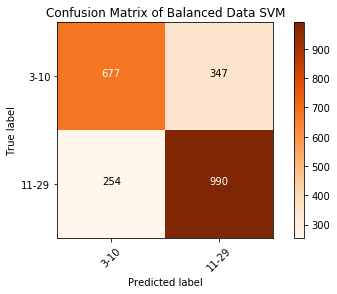

In [42]:
#Confusion Matrix
clfbal.fit(x_train_bal,y_train_bal)
predicted_balanced = clfbal.predict(x_train_bal)
print("Accuracy: ", accuracy_score(y_train_bal, predicted_balanced))
classes= ['3-10', '11-29']
cmbal = confusion_matrix(y_train_bal, predicted_balanced)
plot_confusion_matrix(cmbal, classes=classes, title="Confusion Matrix of Balanced Data SVM")

In [43]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\virgi\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

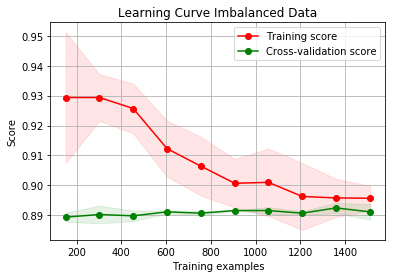

In [44]:
#LEARNING CURVE IMBALANCED (SENZA OVERSAMPLING)
plot_learning_curve(estimator = svm.SVC(gamma=1,C=10), title="Learning Curve Imbalanced Data", X=x_train_imb, y=y_train_imb, train_sizes=np.linspace(.1, 1.0, 10))

<module 'matplotlib.pyplot' from 'C:\\Users\\virgi\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

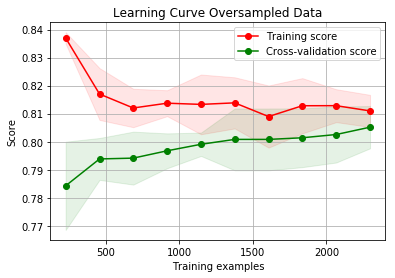

In [45]:
#LEARNING CURVE IMBALANCED ( DOPO OVERSAMPLING)
plot_learning_curve(estimator = svm.SVC(gamma=1,C=10), title="Learning Curve Oversampled Data", X=x_trainfSMO, y=y_traintSMO, train_sizes=np.linspace(.1, 1.0, 10))

<module 'matplotlib.pyplot' from 'C:\\Users\\virgi\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

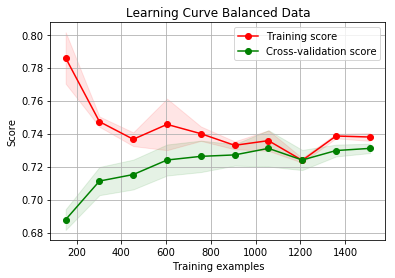

In [46]:
plot_learning_curve(estimator = svm.SVC(gamma=1,C=10), title="Learning Curve Balanced Data", X=x_train_bal, y=y_train_bal, train_sizes=np.linspace(.1, 1.0, 10))

In [47]:
train_target_imbalanced.shape


(2835,)

In [48]:
trainfSMO.shape

(4305, 8)

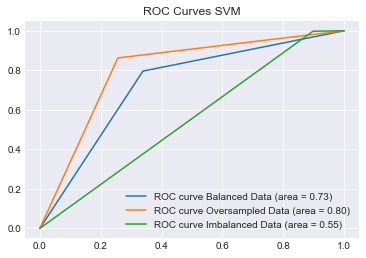

In [51]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

targetbal = pd.Categorical(y_train_bal).rename_categories([0,1])
predictedbal = pd.Categorical(predicted_balanced).rename_categories([0,1])
fprbal, tprbal, _ =  roc_curve(targetbal, predictedbal)
roc_auc = auc(fprbal, tprbal)

targetSMO = pd.Categorical(y_traintSMO).rename_categories([0,1])
predictedSMO = pd.Categorical(predictedSMO).rename_categories([0,1])
fprSMO, tprSMO, _ =  roc_curve(targetSMO, predictedSMO)
roc_auc2 = auc(fprSMO, tprSMO)

targetimb = pd.Categorical(y_train_imb).rename_categories([0,1])
predictedimb = pd.Categorical(predicted_imbalanced).rename_categories([0,1])
fprimb, tprimb, _ =  roc_curve(targetimb, predictedimb)
roc_auc3 = auc(fprimb, tprimb)

 
sns.set_style("darkgrid")
plt.plot(fprbal,tprbal, label='ROC curve Balanced Data (area = %0.2f)' % roc_auc)
plt.plot(fprSMO,tprSMO, label='ROC curve Oversampled Data (area = %0.2f)' % roc_auc2)
plt.plot(fprimb,tprimb, label='ROC curve Imbalanced Data (area = %0.2f)' % roc_auc3)

plt.title("ROC Curves SVM")

plt.legend(loc="lower right")
plt.show()

**********************KNN*******************************

In [53]:
#
# k-NN
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import numpy as np

In [54]:
knn = KNeighborsClassifier()
k_range = list(range(2, 31))
print(k_range)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [58]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [59]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [60]:
#BALANCED DATA!!!!!
# fit the grid with data
grid.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [61]:
#view the complete results (list of named tuples)
grid.grid_scores_

C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.63713, std: 0.01281, params: {'n_neighbors': 2},
 mean: 0.67504, std: 0.02253, params: {'n_neighbors': 3},
 mean: 0.67857, std: 0.02257, params: {'n_neighbors': 4},
 mean: 0.70062, std: 0.01929, params: {'n_neighbors': 5},
 mean: 0.69797, std: 0.02923, params: {'n_neighbors': 6},
 mean: 0.70547, std: 0.03033, params: {'n_neighbors': 7},
 mean: 0.70194, std: 0.02820, params: {'n_neighbors': 8},
 mean: 0.71429, std: 0.02254, params: {'n_neighbors': 9},
 mean: 0.69885, std: 0.02196, params: {'n_neighbors': 10},
 mean: 0.70855, std: 0.01756, params: {'n_neighbors': 11},
 mean: 0.70811, std: 0.01568, params: {'n_neighbors': 12},
 mean: 0.71737, std: 0.01948, params: {'n_neighbors': 13},
 mean: 0.70767, std: 0.01537, params: {'n_neighbors': 14},
 mean: 0.71384, std: 0.01500, params: {'n_neighbors': 15},
 mean: 0.70723, std: 0.01813, params: {'n_neighbors': 16},
 mean: 0.71649, std: 0.01312, params: {'n_neighbors': 17},
 mean: 0.71164, std: 0.01114, params: {'n_neighbors': 18},
 mean

In [63]:
# examine the first tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Parameters
{'n_neighbors': 2}

CV Validation Score
[0.63436123 0.63876652 0.61453744 0.65198238 0.6460177 ]

Mean Validation Score
0.6371252204585538


C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [64]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.6371252204585538, 0.6750440917107584, 0.6785714285714286, 0.7006172839506173, 0.6979717813051146, 0.7054673721340388, 0.7019400352733686, 0.7142857142857143, 0.6988536155202821, 0.7085537918871252, 0.7081128747795414, 0.7173721340388007, 0.7076719576719577, 0.7138447971781305, 0.7072310405643739, 0.7164902998236331, 0.7116402116402116, 0.7094356261022927, 0.7063492063492064, 0.7195767195767195, 0.7116402116402116, 0.7129629629629629, 0.7103174603174603, 0.7094356261022927, 0.7076719576719577, 0.7085537918871252, 0.7094356261022927, 0.7094356261022927, 0.7037037037037037]


C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

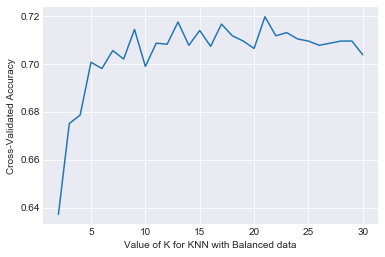

In [65]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN with Balanced data')
plt.ylabel('Cross-Validated Accuracy')

In [66]:
# examine the best model PER DATI BILANCIATI!!

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.7195767195767195
{'n_neighbors': 21}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')


In [67]:
n_neighbors = 21
weights = 'uniform'
knnBIL= neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [68]:
#BALANCED
knnBIL.fit(x_train_bal, y_train_bal)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [69]:
for i in range(10):
    p = knnBIL.predict(x_train_bal[i].reshape(1, -1))
    print(i, ":", x_train_bal[i], "predicted: ", p[0], " real: ", y_train_bal[i])

0 : [1 0.555 0.45 0.175 0.8740000000000001 0.3275 0.20199999999999999 0.305] predicted:  3-10  real:  3-10
1 : [1 0.58 0.445 0.135 0.8140000000000001 0.3775 0.1915 0.22] predicted:  3-10  real:  3-10
2 : [0 0.475 0.39 0.12 0.5305 0.2135 0.1155 0.17] predicted:  3-10  real:  3-10
3 : [1 0.67 0.515 0.165 1.1735 0.526 0.285 0.316] predicted:  11-29  real:  11-29
4 : [1 0.705 0.55 0.21 1.4385 0.655 0.3255 0.462] predicted:  11-29  real:  11-29
5 : [0 0.565 0.455 0.175 1.013 0.342 0.207 0.35] predicted:  11-29  real:  11-29
6 : [0 0.605 0.48 0.175 1.1685 0.4815 0.2305 0.35600000000000004] predicted:  3-10  real:  3-10
7 : [1 0.61 0.49 0.16 1.146 0.597 0.24600000000000002 0.265] predicted:  3-10  real:  3-10
8 : [1 0.48 0.375 0.115 0.6765 0.3205 0.1065 0.17] predicted:  3-10  real:  3-10
9 : [0 0.64 0.52 0.175 1.248 0.4245 0.2595 0.48] predicted:  11-29  real:  11-29


In [70]:
scoresBIL = cross_val_score(knnBIL, x_train_bal, y_train_bal, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresBIL.mean(), scoresBIL.std() * 2))

Accuracy: 0.72 (+/- 0.02)


Accuracy:  0.736331569664903
Confusion matrix, without normalization
[[ 643  381]
 [ 217 1027]]


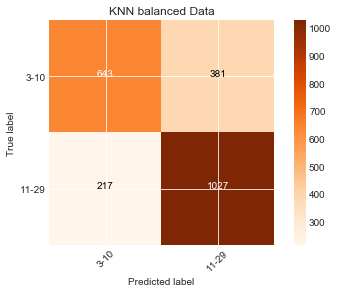

In [71]:
#Confusion Matrix balanced
knnBIL.fit(x_train_bal,y_train_bal)
predicted_bil = knnBIL.predict(x_train_bal)
print("Accuracy: ", accuracy_score(predicted_bil, y_train_bal))
classes= ['3-10', '11-29']
cmBIL = confusion_matrix(y_train_bal, predicted_bil)
plot_confusion_matrix(cmBIL, classes=classes, title='KNN balanced Data')

In [72]:
#UNBALANCED DATA!!!!! (DOPO OVERSAMPLING)
# fit the grid with data
grid.fit(x_trainfSMO, y_traintSMO)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
# view the complete results (list of named tuples)
grid.grid_scores_

C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86237, std: 0.01050, params: {'n_neighbors': 2},
 mean: 0.88124, std: 0.01194, params: {'n_neighbors': 3},
 mean: 0.85134, std: 0.01661, params: {'n_neighbors': 4},
 mean: 0.86237, std: 0.01997, params: {'n_neighbors': 5},
 mean: 0.84582, std: 0.01424, params: {'n_neighbors': 6},
 mean: 0.85656, std: 0.01655, params: {'n_neighbors': 7},
 mean: 0.84059, std: 0.01647, params: {'n_neighbors': 8},
 mean: 0.84872, std: 0.02010, params: {'n_neighbors': 9},
 mean: 0.83798, std: 0.02238, params: {'n_neighbors': 10},
 mean: 0.84117, std: 0.02514, params: {'n_neighbors': 11},
 mean: 0.83420, std: 0.02687, params: {'n_neighbors': 12},
 mean: 0.83566, std: 0.02532, params: {'n_neighbors': 13},
 mean: 0.83130, std: 0.02644, params: {'n_neighbors': 14},
 mean: 0.83537, std: 0.02417, params: {'n_neighbors': 15},
 mean: 0.82956, std: 0.02542, params: {'n_neighbors': 16},
 mean: 0.83072, std: 0.02719, params: {'n_neighbors': 17},
 mean: 0.82753, std: 0.02403, params: {'n_neighbors': 18},
 mean

In [74]:
# examine the first tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Parameters
{'n_neighbors': 2}

CV Validation Score
[0.85362319 0.87953556 0.85776488 0.85174419 0.86918605]

Mean Validation Score
0.8623693379790941


C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [75]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.8623693379790941, 0.8812427409988386, 0.851335656213705, 0.8623693379790941, 0.8458188153310104, 0.8565621370499419, 0.8405923344947736, 0.8487224157955865, 0.837979094076655, 0.8411730545876888, 0.8342044134727061, 0.8356562137049942, 0.8313008130081301, 0.8353658536585366, 0.8295586527293844, 0.8307200929152149, 0.8275261324041812, 0.828397212543554, 0.825493612078978, 0.8220092915214866, 0.820267131242741, 0.8179442508710801, 0.8162020905923345, 0.8182346109175378, 0.8162020905923345, 0.8159117305458768, 0.8147502903600464, 0.8159117305458768, 0.8132984901277585]


C:\Users\virgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

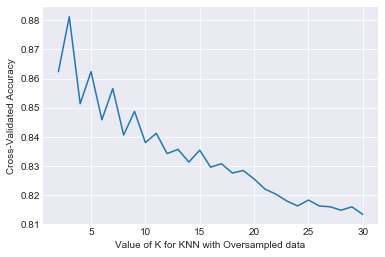

In [76]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN with Oversampled data')
plt.ylabel('Cross-Validated Accuracy')

In [77]:
# examine the best model PER DATI SBILANCIATI!!

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8812427409988386
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [78]:
n_neighbors = 3
weights = 'uniform'
clfSMOTE = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [79]:
#UNBALANCED CON OVERSAMPLING
clfSMOTE.fit(x_trainfSMO, y_traintSMO)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [80]:
for i in range(10):
    p = clfSMOTE.predict(x_trainfSMO[i].reshape(1, -1))
    print(i, ":", x_trainfSMO[i], "predicted: ", p[0], " real: ", y_traintSMO[i])

0 : [1.     0.71   0.55   0.2    1.9045 0.882  0.44   0.5   ] predicted:  3-14  real:  3-14
1 : [1.     0.61   0.5    0.165  1.2715 0.4915 0.185  0.49  ] predicted:  15-29  real:  3-14
2 : [1.     0.66   0.51   0.175  1.218  0.5055 0.303  0.37  ] predicted:  3-14  real:  3-14
3 : [1.     0.575  0.45   0.13   0.785  0.318  0.193  0.2265] predicted:  3-14  real:  3-14
4 : [1.     0.5    0.385  0.12   0.6335 0.2305 0.125  0.235 ] predicted:  3-14  real:  3-14
5 : [1.     0.505  0.39   0.115  0.5585 0.2575 0.119  0.1535] predicted:  3-14  real:  3-14
6 : [1.         0.43295165 0.33355385 0.13295165 0.40471584 0.14398133
 0.06392154 0.15862594] predicted:  15-29  real:  15-29
7 : [1.     0.56   0.455  0.165  0.86   0.4015 0.1695 0.245 ] predicted:  3-14  real:  3-14
8 : [0.         0.67886346 0.54886346 0.20659038 1.74222692 0.61727582
 0.31966138 0.62045383] predicted:  15-29  real:  15-29
9 : [0.     0.585  0.455  0.165  0.998  0.345  0.2495 0.315 ] predicted:  3-14  real:  3-14


In [81]:
scoresSMOTE = cross_val_score(clfSMOTE, x_trainfSMO, y_traintSMO, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresSMOTE.mean(), scoresSMOTE.std() * 2))

Accuracy: 0.88 (+/- 0.02)


Accuracy:  0.9384436701509872
Confusion matrix, without normalization
[[1436   10]
 [ 202 1796]]


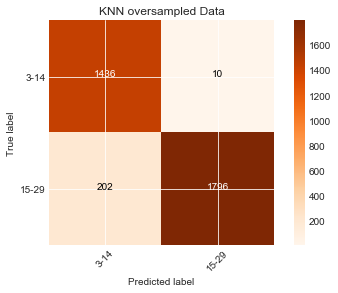

In [82]:
#Confusion Matrix OVERSAMPLED
clfSMOTE.fit(x_trainfSMO,y_traintSMO)
predicted_SMO = clfSMOTE.predict(x_trainfSMO)
print("Accuracy: ", accuracy_score(predicted_SMO, y_traintSMO))
classes= ['3-14', '15-29']
cmSMOTE = confusion_matrix(y_traintSMO, predicted_SMO)
plot_confusion_matrix(cmSMOTE, classes=classes, title='KNN oversampled Data')

In [83]:
train_target.shape

(2835,)

In [84]:
traintSMO.shape

(4305,)

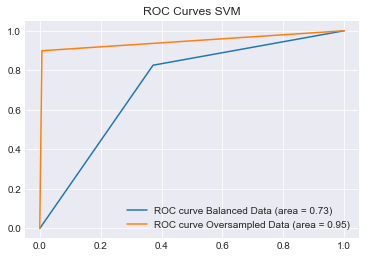

In [85]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

targetbal = pd.Categorical(y_train_bal).rename_categories([0,1])
predictedbal = pd.Categorical(predicted_bil).rename_categories([0,1])
fprbal, tprbal, _ =  roc_curve(targetbal, predictedbal)
roc_auc = auc(fprbal, tprbal)

targetSMO = pd.Categorical(y_traintSMO).rename_categories([0,1])
predictedSMO = pd.Categorical(predicted_SMO).rename_categories([0,1])
fprSMO, tprSMO, _ =  roc_curve(targetSMO, predictedSMO)
roc_auc2 = auc(fprSMO, tprSMO)

sns.set_style("darkgrid")
plt.plot(fprbal,tprbal, label='ROC curve Balanced Data (area = %0.2f)' % roc_auc)
plt.plot(fprSMO,tprSMO, label='ROC curve Oversampled Data (area = %0.2f)' % roc_auc2)

plt.title("ROC Curves SVM")

plt.legend(loc="lower right")
plt.show()